In [70]:
import h5py
from pathlib import Path
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [18]:
path_prec = Path("DATA/PRECIPTACAO/")
file = path_prec / '3B42.20080330.00.7A.HDF'

In [47]:
file.as_posix()

'DATA/PRECIPTACAO/3B42.20080330.00.7A.HDF'

In [21]:
prec = h5py.File(file.as_posix(), "r")
prec

<HDF5 file "3B42.20080330.00.7A.HDF" (mode r)>

In [103]:
a_group_key = list(prec.keys())[0]

# Get the data
data = np.array(prec[a_group_key])

In [104]:
data.shape

(1440, 400)

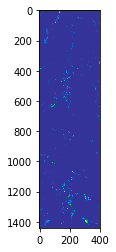

In [105]:
plt.imshow(data,cmap="terrain")

Esse dados estao entre a longitude -180 e 180 e latitude 50 , - 50 (ESSA ORDEM E IMPORTANTE) com resolucao de 0.5

In [106]:
lon = np.arange(-180,180,0.25)
lat = np.arange(50,-50,-.25)

Vou girar os dados em 90 graus

In [107]:
data = np.rot90(data)

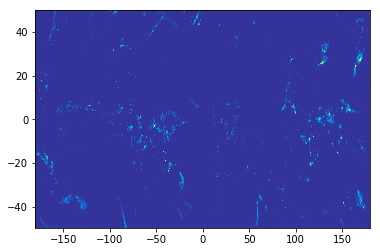

In [108]:
plt.pcolormesh(lon,lat,data,cmap="terrain");

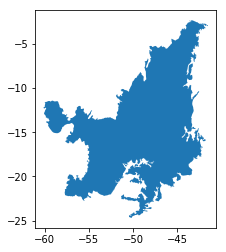

In [109]:
shapefile_path = "DATA/cerrado/shape.shp"
cerrado_shp = gpd.read_file(shapefile_path)
cerrado_shp.plot()

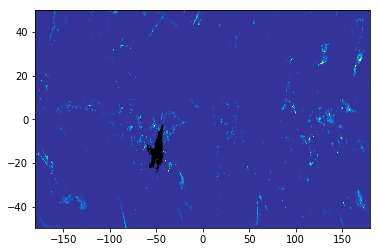

In [110]:
fig,ax = plt.subplots(1,1)

ax.pcolormesh(lon,lat,data,cmap="terrain")
cerrado_shp.plot(ax=ax,cmap='gray');

In [111]:
poly_cerrado = cerrado_shp.iloc[0]["geometry"]

In [112]:
mask = np.full_like(data,True,dtype=bool)

for lat_index in range(mask.shape[0]):
    for lon_index in range(mask.shape[1]):
        point = Point(lon[lon_index],lat[lat_index])
        
        if point.within(poly_cerrado):
            # all points insinde the polygon are marked to False (in the np masked logic = No invalid)
            mask[lat_index,lon_index] = False

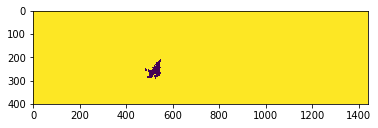

In [113]:
plt.imshow(mask)

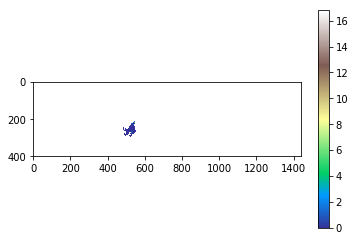

In [115]:
masked_data = np.ma.masked_array(data,mask)
plt.imshow(masked_data,cmap="terrain")
plt.colorbar();